In [11]:
import pandas as pd
from scipy import stats
import numpy as np
from dit.divergences import jensen_shannon_divergence
from scipy.spatial import distance
import scipy.spatial.distance as ssd
from scipy.cluster.hierarchy import dendrogram, linkage
import random
import seaborn as sns

In [13]:
# Generate some sample data
random.seed(123)
day0 = np.abs(np.random.normal(50, 19, 1000))
day1 = day0 + 1
day2 = day0 + 2

day3 = day1 + 80
day4 = day1 + 100 # Day of event
day5 = day1 + 90

day6 = day1 + 1
day7 = day2 + 1
day8 = day1 + 1

samp_dat = pd.DataFrame({'day': np.repeat([1, 2, 3, 4, 5, 6, 7, 8, 9], 1000),
                        'distance': np.concatenate([day0, day1, day2, day3, day4, \
                                                   day5, day6, day7, day8])})
samp_dat['distance'] = np.log(1 + samp_dat['distance'])

In [14]:
samp_dat

,day,distance
0,1,3.651157
1,1,3.238867
2,1,3.881617
3,1,4.409679
4,1,3.688022
5,1,3.452562
6,1,4.284264
7,1,4.506277
8,1,4.403458
9,1,4.351154


In [16]:
# Get JS Distances
jds_dmat = pd.DataFrame()
for i in range(1, 10):
    for j in range(1, 10):
        x = samp_dat[samp_dat['day'] == i].distance
        y = samp_dat[samp_dat['day'] == j].distance
        jds = distance.jensenshannon(x, y)
        outdat = pd.DataFrame({'day_a': [i], 'day_b': [j], 'jds': [round(jds, 4)]})
        jds_dmat = jds_dmat.append(outdat, ignore_index=True)

In [17]:
jds_dmat

,day_a,day_b,jds
0,1,1,0.0000
1,1,2,0.0022
2,1,3,0.0041
3,1,4,0.0334
4,1,5,0.0350
5,1,6,0.0343
6,1,7,0.0041
7,1,8,0.0058
8,1,9,0.0041
9,2,1,0.0022


In [20]:
# Calculate distance matrix
distMatrix = jds_dmat.pivot(index='day_a', columns='day_b', values='jds')
distArray = ssd.squareform(distMatrix)
print(distMatrix)

day_b       1       2       3       4       5       6       7       8       9
day_a                                                                        
1      0.0000  0.0022  0.0041  0.0334  0.0350  0.0343  0.0041  0.0058  0.0041
2      0.0022  0.0000  0.0019  0.0314  0.0330  0.0323  0.0019  0.0035  0.0019
3      0.0041  0.0019  0.0000  0.0296  0.0313  0.0305  0.0000  0.0017  0.0000
4      0.0334  0.0314  0.0296  0.0000  0.0017  0.0009  0.0296  0.0281  0.0296
5      0.0350  0.0330  0.0313  0.0017  0.0000  0.0008  0.0313  0.0297  0.0313
6      0.0343  0.0323  0.0305  0.0009  0.0008  0.0000  0.0305  0.0290  0.0305
7      0.0041  0.0019  0.0000  0.0296  0.0313  0.0305  0.0000  0.0017  0.0000
8      0.0058  0.0035  0.0017  0.0281  0.0297  0.0290  0.0017  0.0000  0.0017
9      0.0041  0.0019  0.0000  0.0296  0.0313  0.0305  0.0000  0.0017  0.0000


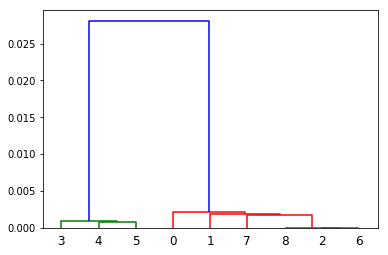

In [21]:
# Perform H-Clustering using distance matrix
# Note 3, 4, 5 days are clustered together as a day of event
Z = linkage(distArray, "single")
dn = dendrogram(Z)

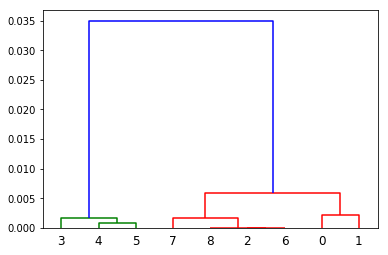

In [22]:
Z = linkage(distArray, "complete")
dn = dendrogram(Z)

In [23]:
from pyclustering.cluster.kmedoids import kmedoids;
from pyclustering.cluster import cluster_visualizer, cluster_visualizer_multidim;
from pyclustering.cluster.kmedoids import kmedoids;

from pyclustering.utils import read_sample;
from pyclustering.utils import timedcall;

distMatrix = np.array(distMatrix)

# K-Medoids Clustering
initial_medoids = [2, 4]

# create K-Medoids algorithm for processing distance matrix instead of points
kmedoids_instance = kmedoids(distMatrix, initial_medoids, data_type='distance_matrix', ccore=True)

# run cluster analysis and obtain results
kmedoids_instance.process()

clusters = kmedoids_instance.get_clusters()
medoids = kmedoids_instance.get_medoids()
print(f"Clusters: {clusters}   Medoids: {medoids}")

Clusters: [[2, 0, 1, 6, 7, 8], [4, 3, 5]]   Medoids: [2, 5]


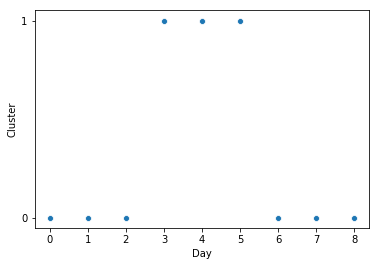

In [24]:
final_list = []
for i, l in enumerate(clusters):
    for num in l:
        final_list.append({'value': num, 'group': i})

df = pd.DataFrame(final_list)
ax = sns.scatterplot(x='value', y='group', data=df)
ax.set(xlabel='Day', ylabel='Cluster')
ax.set_yticks([0, 1])
